<a href="https://colab.research.google.com/github/mercedes6115/ai/blob/main/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ID: MeOxunDCd85lyEKG3GDT


PW: VHI4dZ6888


# 프레임워크 : 프렌차이즈 --> 가맹점을 여는 개념 라이브러리의 집합체 느낌

In [51]:
import os # 운영체제 접근 라이브러리 
import sys
import requests
client_id = "MeOxunDCd85lyEKG3GDT"
client_secret = "VHI4dZ6888"
url = "https://openapi.naver.com/v1/vision/face" #// 얼굴감지
#url = "https://openapi.naver.com/v1/vision/celebrity" # // 유명인 얼굴인식
files = {'image': open('/content/gdrive/My Drive/Colab Notebooks/qqqq.jpg', 'rb')}    # /content/gdrive/My Drive/Colab Notebooks/ 까지가 기본 경로로 고정
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)



{"info":{"size":{"width":1125,"height":675},"faceCount":3},"faces":[{"roi":{"x":578,"y":250,"width":127,"height":127},"landmark":null,"gender":{"value":"female","confidence":0.999716},"age":{"value":"4~8","confidence":0.729892},"emotion":{"value":"laugh","confidence":0.971816},"pose":{"value":"rotate_face","confidence":0.47107}},{"roi":{"x":29,"y":281,"width":194,"height":194},"landmark":{"leftEye":{"x":70,"y":323},"rightEye":{"x":156,"y":329},"nose":{"x":89,"y":382},"leftMouth":{"x":66,"y":418},"rightMouth":{"x":141,"y":429}},"gender":{"value":"male","confidence":0.996395},"age":{"value":"39~43","confidence":0.578629},"emotion":{"value":"smile","confidence":0.996869},"pose":{"value":"frontal_face","confidence":0.99891}},{"roi":{"x":406,"y":65,"width":114,"height":114},"landmark":null,"gender":{"value":"female","confidence":0.999574},"age":{"value":"68~72","confidence":0.170787},"emotion":{"value":"neutral","confidence":0.978629},"pose":{"value":"false_face","confidence":0.997129}}]}


In [ ]:
from google.colab import drive # 구글 드라이브 에서 이미지 파일 불러오는 방법 코랩에 기본 경로 고정 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
import json

parsed = json.loads(response.text)

# print(parsed)
# print(json.dumps(parsed, indent=4))

# parsed.keys()
print(parsed['info']['size']['height'])
# print(parsed['info']['faceCount'])
# print(parsed['faces'])
# parsed['faces'][2]

675


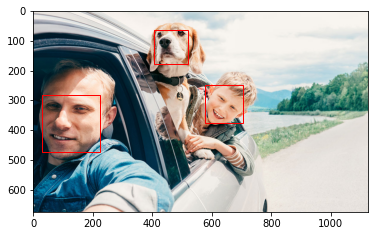

In [98]:
import matplotlib.patches as patches # 사진 수정 관련 모듈 
import matplotlib.image as mpimg # 사진 파일 읽어오는 모듈
import matplotlib.pyplot as plt # 사진 관련 기본 모듈


img = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/qqqq.jpg')
fig,ax = plt.subplots() # 사진을 표시할 액자와 사진 설정 
ax.imshow(img)

for i in range(0,parsed['info']['faceCount']):
  x,y,w,h = parsed['faces'][i]['roi'].values() # 
  re_face = patches.Rectangle((x,y),w,h,facecolor='none',edgecolor='r') # 얼굴 인식범위 확인을 위해 사진 수정
  ax.add_patch(re_face)
ax.imshow(img)

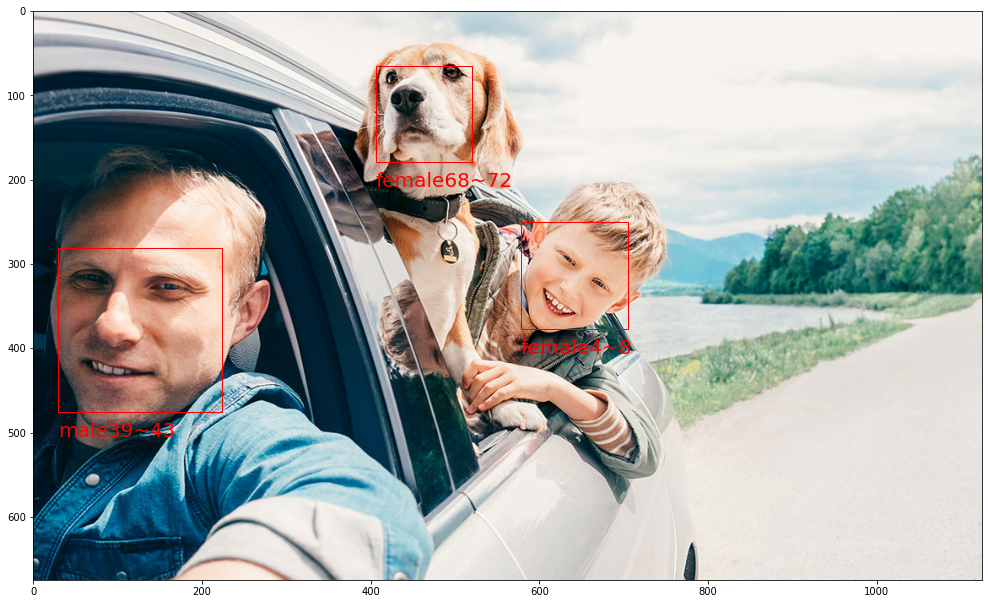

In [133]:
import matplotlib.patches as patches # 사진 수정 관련 모듈 
import matplotlib.image as mpimg # 사진 파일 읽어오는 모듈
import matplotlib.pyplot as plt # 사진 관련 기본 모듈


img = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/qqqq.jpg')
fig,ax = plt.subplots() # 사진을 표시할 액자와 사진 설정 
ax.imshow(img)

for i in range(0,parsed['info']['faceCount']):
  age, age_conf=parsed['faces'][i]['age'].values()
  gender,gender_conf=parsed['faces'][i]['gender'].values()
  anno = gender + '' + age
  hh = parsed['info']['size']['height']+20
  x,y,w,h = parsed['faces'][i]['roi'].values() # 
  re_face = patches.Rectangle((x,y),w,h,facecolor='none',edgecolor='r') # 얼굴 인식범위 확인을 위해 사진 수정
  ax.add_patch(re_face)
  re_face = plt.text(x, y+h+30, anno, fontsize=20, color='red')

plt.rcParams['figure.figsize'] = [17, 20]
ax.imshow(img)